In [113]:
%run functions/cytoscapeFunctions
%run functions/edgeFunctions
%run functions/springLayoutJN-Copy1

In [114]:
from py2cytoscape import cyrest
import networkx as nx
import numpy as np
import pandas as pd
import random
import time
import tempfile
from networkx.generators.random_graphs import barabasi_albert_graph as ba

In [115]:
dirPath = os.path.dirname(os.path.abspath('template.cys'))

In [116]:
cytoscape = cyrest.cyclient()

In [117]:
cytoscape.status()

CyREST online!


In [118]:
from py2cytoscape.data.cyrest_client import CyRestClient
cy = CyRestClient()

In [119]:
cy.session.delete()

In [120]:
import os
cytoscape.session.open(session_file = os.path.abspath("template.cys"))

In [121]:
# G = nx.fast_gnp_random_graph(15, 0.2)
# G1 = nx.fast_gnp_random_graph(10, 0.3)
# addEdgeAttrib(G, 'weight', 25,30)
# addEdgeAttrib(G, 'color',5,200)
# addEdgeAttrib(G1, 'weight',30,35)
# addEdgeAttrib(G1, 'color',5,200)

In [122]:
networkFolder = os.path.join(os.path.dirname(os.path.abspath("template.cys")), 'networks')
networkFolder

GMP = os.path.join(networkFolder, 'GMP')
Prog = os.path.join(networkFolder, 'Progenitor')

GMPedge = os.path.join(GMP, 'edge.tsv')
GMPnode = os.path.join(GMP, 'node.tsv')

ProgEdge = os.path.join(Prog, 'edge.tsv')
ProgNode = os.path.join(Prog, 'node.tsv')

gmpEdgeDF = pd.read_csv(GMPedge, delimiter = '\t')
gmpNodeDF = pd.read_csv(GMPnode, delimiter = '\t')
progEdgeDF = pd.read_csv(ProgEdge, delimiter = '\t')
progNodeDF = pd.read_csv(ProgNode, delimiter = '\t')

gmpNetwork = nx.Graph()
gmpOverlap = 0

for i in range (len(gmpEdgeDF)):
    if gmpNetwork.has_edge(gmpEdgeDF['Regulator'][i], gmpEdgeDF['Target'][i]):
        gmpOverlap += 1
    gmpNetwork.add_edge(gmpEdgeDF['Regulator'][i], gmpEdgeDF['Target'][i])
    
progNetwork = nx.Graph()

progOverlap = 0

for i in range (len(progEdgeDF)):
    if progNetwork.has_edge(progEdgeDF['Regulator'][i], progEdgeDF['Target'][i]):
        progOverlap += 1
    progNetwork.add_edge(progEdgeDF['Regulator'][i], progEdgeDF['Target'][i])

print(gmpOverlap, progOverlap)    

gmpNodeIndexDF = gmpNodeDF.set_index('Name')
progNodeIndexDF = progNodeDF.set_index('Name')

nx.set_node_attributes(gmpNetwork, gmpNodeDF.to_dict('index'))
nx.set_node_attributes(gmpNetwork, gmpNodeIndexDF.to_dict('index'))

gmpNetwork1 = gmpNetwork.copy()
# gmpNetwork1.remove_node('IRF7')

nx.set_node_attributes(progNetwork, progNodeDF.to_dict('index'))
nx.set_node_attributes(progNetwork, progNodeIndexDF.to_dict('index'))

32 10


In [143]:
addEdgeAttrib(gmpNetwork, 'weight',0,1)
addEdgeAttrib(gmpNetwork1, 'weight', 0, 1)

In [124]:
# addEdgeAttrib(progNetwork, 'weight', 17,23)

In [144]:
conformEdges(gmpNetwork, gmpNetwork1)
# conformEdges(gmpNetwork, progNetwork)
networks = fillBetweenEdges(gmpNetwork, gmpNetwork1, 10)
# networks2 = fillBetweenEdges(gmpNetwork, progNetwork, 10)

In [126]:
deleteZeroWeights(networks)

In [127]:
importEdge(convertEdge(networks[0]), cytoscape)

In [128]:
importNode(convertNode(networks[0]), cytoscape)

In [132]:
deleteLoneListNodes(networks)

In [133]:
convertNode(networks[0]).index

Index(['BCL11A', 'CSTA', 'IL3RA', 'IRF7', 'LYZ', 'MZB1', 'RNASE2', 'SPIB',
       'TCF4', 'CEBPB',
       ...
       'LRRC26', 'MALAT1', 'OFD1', 'TPI1', 'TSPAN13', 'MYLK', 'TCF7', 'XBP1',
       'HSP90B1', 'HSPA5'],
      dtype='object', length=248)

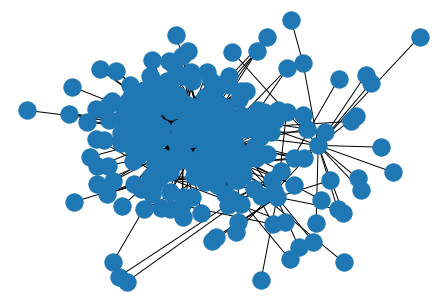

In [145]:
layout = fruchterman_reingold_layout_edit(networks[0], seed = 1, iterations = 1000, pretendIterations = 50, stop = 100)
layoutList = list(layout.values())
for x in range(len(layoutList)):
    for y in range (2):
        layoutList[x][y] = (layoutList[x][y]*1250)
layoutPD = pd.DataFrame(layoutList, columns = ['x','y'],index = convertNode(networks[0]).index)
nx.draw(networks[0], pos = layout)